In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Dataset.csv')
X = dataset.iloc[:, 2:7].values
y = dataset.iloc[:, 6].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [2])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 0:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
    
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))

# Adding the second hidden layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#classifier.summary()
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 2, epochs = 100)



# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.75)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
    classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 1, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
    classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 1)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Epoch 1/100
1185/1185 [==============================] - 1s 813us/step - loss: 0.2428 - acc: 0.9367
Epoch 2/100
1185/1185 [==============================] - 0s 405us/step - loss: 0.0274 - acc: 1.0000
Epoch 3/100
1185/1185 [==============================] - 0s 401us/step - loss: 0.0112 - acc: 1.0000
Epoch 4/100
1185/1185 [==============================] - 1s 477us/step - loss: 0.0065 - acc: 1.0000
Epoch 5/100
1185/1185 [==============================] - 1s 528us/step - loss: 0.0039 - acc: 1.0000
Epoch 6/100
1185/1185 [==============================] - 1s 487us/step - loss: 0.0024 - acc: 1.0000
Epoch 7/100
1185/1185 [==============================] - 0s 407us/step - loss: 0.0015 - acc: 1.0000
Epoch 8/100
1185/1185 [==============================] - 0s 406us/step - loss: 9.1930e-04 - acc: 1.0000
Epoch 9/100
1185/1185 [==============================] - 0s 399us/step - loss: 6.1026e-04 - acc: 1.0000
Epoch 10/100
1185/1185 [==============================] - 0s 397us/step - loss: 4.1840e-04 -

KeyboardInterrupt: 

In [4]:
dataset.head()

,SlNo,CustomerName,Region,TINR,ENGR,IU,HasComplaints
0,1,Qpower,EXP,600.0,VP,1,0
1,2,PGCIL KOLAR,RN,800.0,VP,0,0
2,3,Qpower bank -Amendment,RN,323.0,RP,1,0
3,4,Simhapuri FerroAlloys,RS,509.0,DS,1,0
4,5,Easen Reyrolle Limited a/C CSPTCL,RS,1456.0,DS,0,0


In [5]:
X = dataset.iloc[:,2:7].values
X

array([['EXP', 600.0, 'VP', 1, 0],
       ['RN', 800.0, 'VP', 0, 0],
       ['RN', 323.0, 'RP', 1, 0],
       ...,
       ['RN', 900.0, 'NK', 0, 0],
       ['RN', 2500.0, 'NK', 0, 0],
       ['RC', 23860.0, 'RU', 1, 0]], dtype=object)

In [6]:
y = dataset.iloc[:,6]
y


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1452    0
1453    0
1454    0
1455    1
1456    0
1457    0
1458    0
1459    0
1460    0
1461    0
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    0
1469    0
1470    0
1471    0
1472    0
1473    0
1474    0
1475    0
1476    0
1477    0
1478    0
1479    0
1480    0
1481    0
Name: HasComplaints, Length: 1482, dtype: int64

In [7]:
dataset.dtypes

SlNo               int64
CustomerName      object
Region            object
TINR             float64
ENGR              object
IU                 int64
HasComplaints      int64
dtype: object

In [8]:
X

array([['EXP', 600.0, 'VP', 1, 0],
       ['RN', 800.0, 'VP', 0, 0],
       ['RN', 323.0, 'RP', 1, 0],
       ...,
       ['RN', 900.0, 'NK', 0, 0],
       ['RN', 2500.0, 'NK', 0, 0],
       ['RC', 23860.0, 'RU', 1, 0]], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [10]:
X

array([[0, 600.0, 14, 1, 0],
       [5, 800.0, 14, 0, 0],
       [5, 323.0, 10, 1, 0],
       ...,
       [5, 900.0, 7, 0, 0],
       [5, 2500.0, 7, 0, 0],
       [3, 23860.0, 11, 1, 0]], dtype=object)

In [79]:
dataset.dtypes


SlNo               int64
CustomerName      object
Region            object
TINR             float64
ENGR              object
IU                 int64
HasComplaints    float64
dtype: object

In [11]:
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [80]:
X


array([[0, 600.0, 14, 1, nan],
       [5, 800.0, 14, 0, nan],
       [5, 323.0, 10, 1, nan],
       ...,
       [5, 900.0, 7, 0, nan],
       [5, 2500.0, 7, 0, nan],
       [3, 23860.0, 11, 1, nan]], dtype=object)

In [11]:
onehotencoder = OneHotEncoder(categorical_features = [2])
X = onehotencoder.fit_transform(X).toarray()

C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [12]:
X = X[0:16, 24:]

In [13]:
X

array([], shape=(16, 0), dtype=float64)

In [23]:
dataset.corr()

,SlNo,TINR,IU
SlNo,1.000000,-0.016383,0.022607
TINR,-0.016383,1.000000,-0.143261
IU,0.022607,-0.143261,1.000000


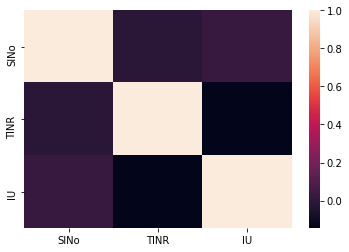

In [17]:
import seaborn as sns
sns.heatmap(dataset.corr())

In [81]:
dataset['HasComplaints'].fillna(0).astype(np.int64)


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1452    0
1453    0
1454    0
1455    1
1456    0
1457    0
1458    0
1459    0
1460    0
1461    0
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    0
1469    0
1470    0
1471    0
1472    0
1473    0
1474    0
1475    0
1476    0
1477    0
1478    0
1479    0
1480    0
1481    0
Name: HasComplaints, Length: 1482, dtype: int64

In [28]:
dataset.dtypes #1111

Month    object
MWR      object
FCV      object
dtype: object

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [83]:
classifier = Sequential()

In [89]:
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [90]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


ValueError: Error when checking input: expected dense_4_input to have shape (11,) but got array with shape (5,)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [88]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


ValueError: Error when checking input: expected dense_4_input to have shape (11,) but got array with shape (5,)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.75)
sns.heatmap(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [25]:
import matplotlib.pyplot as plt

plt.lineplot(dataset.corr())

AttributeError: module 'matplotlib.pyplot' has no attribute 'lineplot'

In [35]:
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 3, 24.54,3,1]])))
new_prediction = (new_prediction > 0.5)

NameError: name 'sc' is not defined

In [57]:
#name = input("what is your name ?")
#print (name)
n = int(input())
a = [0] * n
print(a)

5
[0, 0, 0, 0, 0]


In [56]:
n=int(input())
while n:
    a=input()
    l=int(len(a))
    for i in range(0,l,1):
        if int(a[l-i-1])>0:
            print(a[l-i-1::-1])
            break;
    n-=1

3
12345
54321
23456
65432
25856545
54565852


In [69]:
dataset['HasComplaints'].fillna(0).astype(np.int64)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1452    0
1453    0
1454    0
1455    1
1456    0
1457    0
1458    0
1459    0
1460    0
1461    0
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    0
1469    0
1470    0
1471    0
1472    0
1473    0
1474    0
1475    0
1476    0
1477    0
1478    0
1479    0
1480    0
1481    0
Name: HasComplaints, Length: 1482, dtype: int64

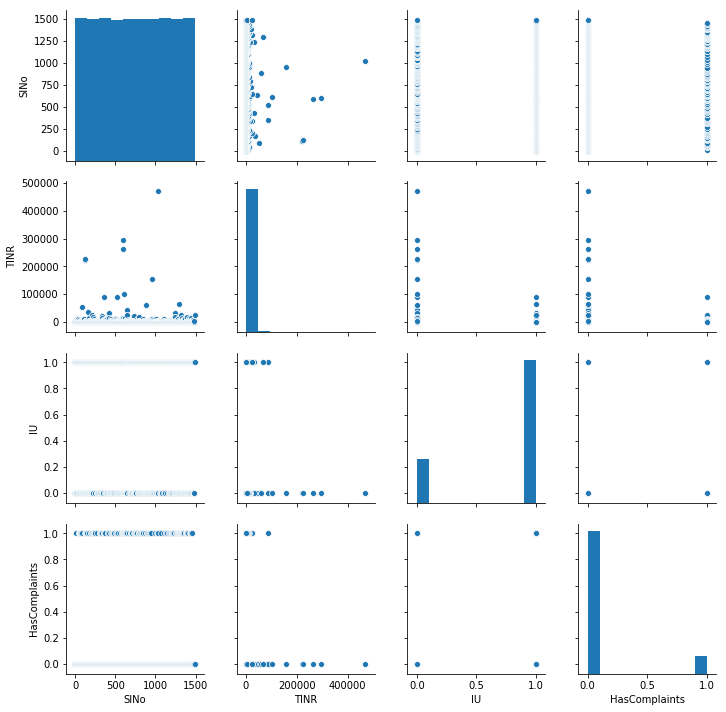

In [5]:
import seaborn as sns
sns.pairplot(dataset)

In [37]:
import matplotlib.pyplot as plt
import csv

x = []
y = []
import xlrd
import numpy as np
import matplotlib.pyplot as plt
file_location = "C:\Users\ADITYA\Desktop\ABB\Rev1.xlsx"
workbook = xlrd.open_workbook(file_location)
first_sheet = workbook.sheet_by_index(0)

x = [first_sheet.cell_value(i, 0) for i in range(first_sheet.ncols)]
y = [first_sheet.cell_value(i, 1) for i in range(first_sheet.ncols)]
yerr_pos = [first_sheet.cell_value(i, 0) for i in range(first_sheet.ncols)]
yerr_neg = [first_sheet.cell_value(i, 1) for i in range(first_sheet.ncols)]

yerr = [yerr_neg, yerr_pos]

plt.errorbar(x,y,yerr,fmt='r^')

plt.axis([0,5,0,5])
plt.show()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-37-b0454b2c4ec9>, line 9)